<a href="https://colab.research.google.com/github/PratShrestha/Netflix_EDA.ipynb/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining Problem Statement and Analysing basic metrics

In [ ]:
#Importing Liabraries for Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # used for data preparation
import numpy as np #linear algebra operations

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:01<00:00, 2.39MB/s]


In [ ]:
# Loading the CSV file named it with 'data' for the dataset.
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#2: Observations on the shape of data, data types of all
The attributes, conversion of categorical attributes to
'category' (If required), missing value detection,
statistical summary

In [ ]:
#To get all attributes.
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#To show no. of columns and rows in dataframe
data.shape

(8807, 12)

In [ ]:
#checking datatypes
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Number of unique values in our dataset.
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#Missing Value Detection
#Data Profiling & Cleaning:

Data Cleaning means the process of idenifying incorrect, incomplete, inaccurate, irrelevant, or
missing pieces of data and then modifying, replacing, or deleting them as needed.

#3. Non-Graphical Analysis:

Non-Graphical Analysis involves calculating the summary statistics, without using pictorial or
graphical representations. There are 3 main functions that Pandas library provide.
 Those functions are:

1. info()

2. isna().sum OR isnull.sum()

3. describe()  

In [ ]:
#This helps us to determine how many numerical and categorical features have in dataset.
#To show indexes, columns, data-types of each column, memory at once.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Missing Value Detection.
#There are a few columns that contain null values, 'director', 'cast', 'country', 'date_added', 'duration', 'rating'.

data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
#We will have to handle all null data points before we can dive into EDA and modelling.

print(data.isnull().sum())
print('total null values across the entire dataset', (data.isnull().sum().sum()))

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
total null values across the entire dataset 4307


In [ ]:
#Statistical Summary Before Data Cleaning

data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Accessing the 'rating' column of the DataFrame and checking the occurences of each of the ratings.
#Notice, min data are also showing in the rating which is not correct.

data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

We will have to handle all null data points before we can dive into EDA and modelling.

In [ ]:
#Splitting the string representation of director names separated by ', ' into a list of individual names for each entry in the 'director' column of the Data.

con1 = data['director'].apply(lambda x: str(x).split(', ')).tolist()

In [ ]:
#Each row represents a movie title, and each row contains a list of director names for that movie.

df_new1=pd.DataFrame(con1,index=data['title'])
df_new1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#Unnesting the directors column, i.e- creating separate lines for each director in a movie.
#Movie titles as the index and a single column 'Directors' containing the director names for each movie.

con1=data['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(con1,index=data['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
#unnesting the cast column, i.e- creating separate lines for each cast member in a movie
#Movie titles as the index and column 'Actors' containing the actor names for each movie.

con2=data['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(con2,index=data['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#unnesting the listed_in column, i.e- creating separate lines for each genre in a movie.
#Movie titles as the index and column 'Genre' containing the stacked Genre for each movie.

con3=data['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(con3,index=data['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
#unnesting the country column, i.e- creating separate lines for each country in a movie
#Movie titles as the index and column 'Country' containing the stacked country for each movie.

con4=data['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(con4,index=data['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
#merging the unnested director data with unnested actors data
df_new5 = df_new1.merge(df_new2, on = ['title'], how = 'inner')

#merging the unnested director data with unnested genre data
df_new6 = df_new5.merge(df_new3, on = ['title'], how = 'inner')

#merging the unnested director data with unnested country data
df_new = df_new6.merge(df_new4, on = ['title'], how = 'inner')
df_new.head()

#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'], 'Unknown Actor', inplace=True)
df_new['Directors'].replace(['nan'], 'Unknown Director', inplace=True)
df_new['country'].replace(['nan'], np.nan, inplace=True)
df_new.head()


,title,Directors,Actors,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa


In [ ]:
#merging our unnested data with the original data

df_final=df_new.merge(data[['show_id', 'type', 'title', 'date_added','release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
#Checking nulls, Country, dat_added, rating, duration have null values.
df_final.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [ ]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [ ]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)

df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [ ]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()].head()
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
#now checking nulls
df_final.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [ ]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director and imputes in place of nulls the corresponding mode

for i in df_final[df_final['country'].isnull()]['Directors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [ ]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
    imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].value_counts().head()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
Name: duration, dtype: int64

In [ ]:
#removing mins from data

df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
#creates a copy of a column named 'duration' within the same DataFrame df_final and
#then creates a copy of the entire DataFrame df_final, storing it in a new DataFrame named df_final1.
#These copies can be useful for various purposes, such as performing different operations without altering the original data.

df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [ ]:
#They replace any values containing the string 'Season' with 0 and then convert all values in the column to integers.

df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [ ]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

#4. Visual Analysis - Univariate & Bivariate

In [ ]:
#New seperate date, month and week columns added in the dataframe.

from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

<ipython-input-105-4159039afc7e>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021


#What is the most types in the DataFrame

There are only 2 major types in Netflix watch: Movies and TV Show.

There are almost half number of TV Shows than there are Movies on Netflix.

<ipython-input-106-310c5cf6e709>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_final1, x = 'type', palette = 'pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

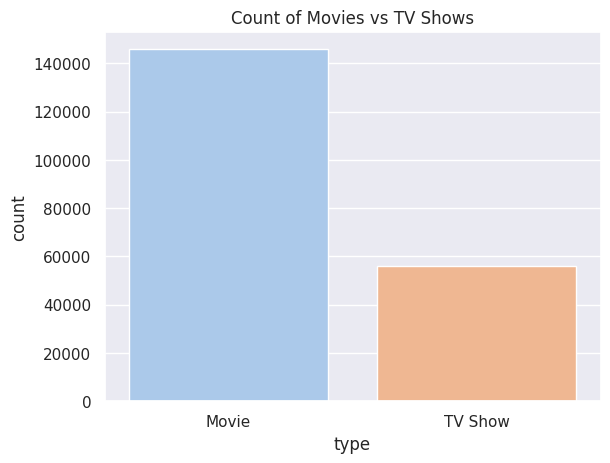

In [ ]:
sns.countplot(data = df_final1, x = 'type', palette = 'pastel')
sns.set_theme(style="darkgrid")
plt.title('Count of Movies vs TV Shows')
plt.show

#There are almost half number of TV Shows than there are Movies on Netflix.

#What is the Top most genre that have highest amount of content in the movies/TV shows ?

In [ ]:
#Top most of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head()

,title
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


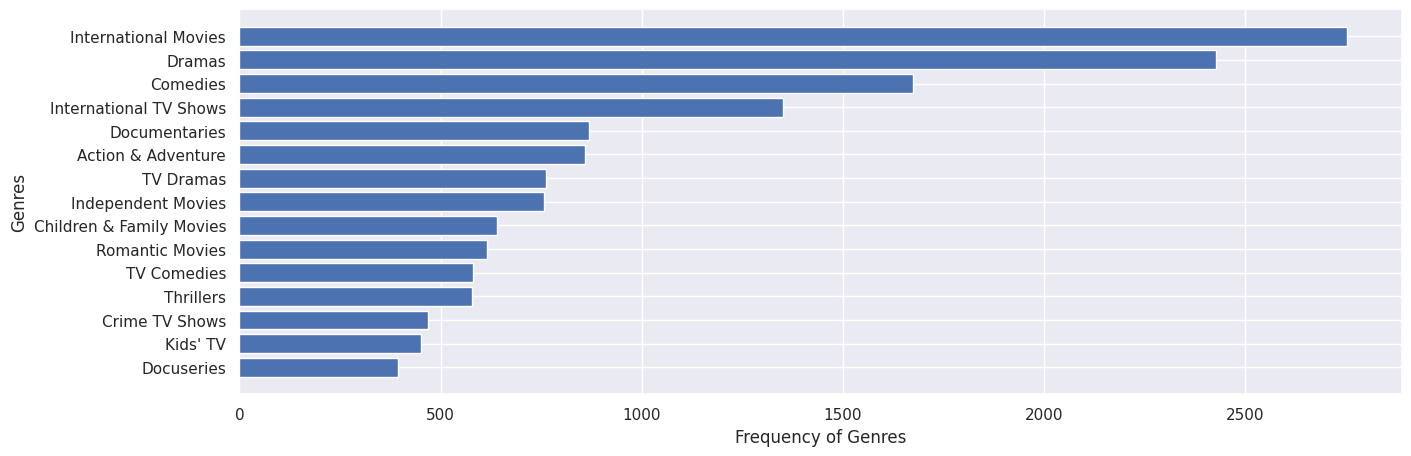

In [ ]:
#International Movies, Dramas and Comedies are the most popular.

df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,5))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

#From the graph, we know that International Movies take the first place, followed by dramas and comedies.

#What is the most popular rating in movies/Tv shows?

Most of the highly rated content on Netflix is intended for (MA) Mature Audiences, R Rated

<ipython-input-109-707f75c7f034>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data= df_final1, palette="Set2", order=df_final1['rating'].value_counts().index[0:15])


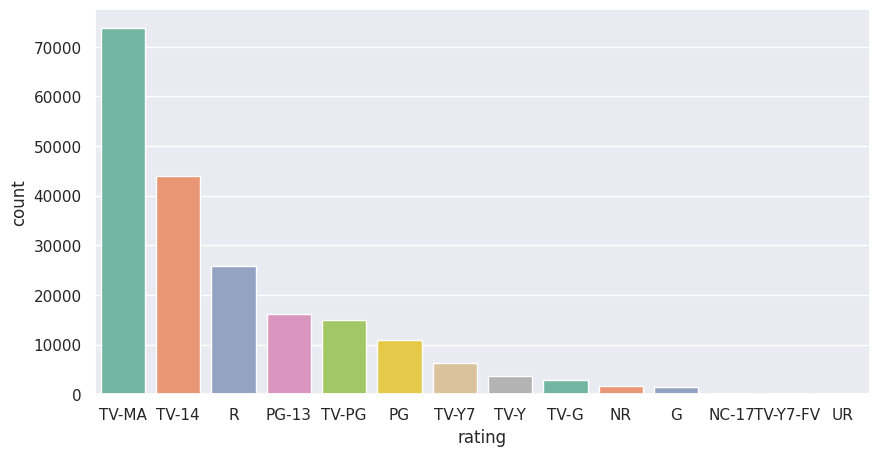

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= df_final1, palette="Set2", order=df_final1['rating'].value_counts().index[0:15])
plt.show()

In [ ]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021


In [ ]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
Argentina,94
Armenia,1
Australia,162
Austria,12


The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same

In [ ]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24,9,38,2021


In [ ]:
#Now will not see the duplicate countries

df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
Argentina,94
Armenia,1
Australia,162
Austria,12


#Which are the Top most leading countries in content creation on Netflix?

Top 5 : US,India,UK,Canada and France are leading countries in Content Creation on Netflix

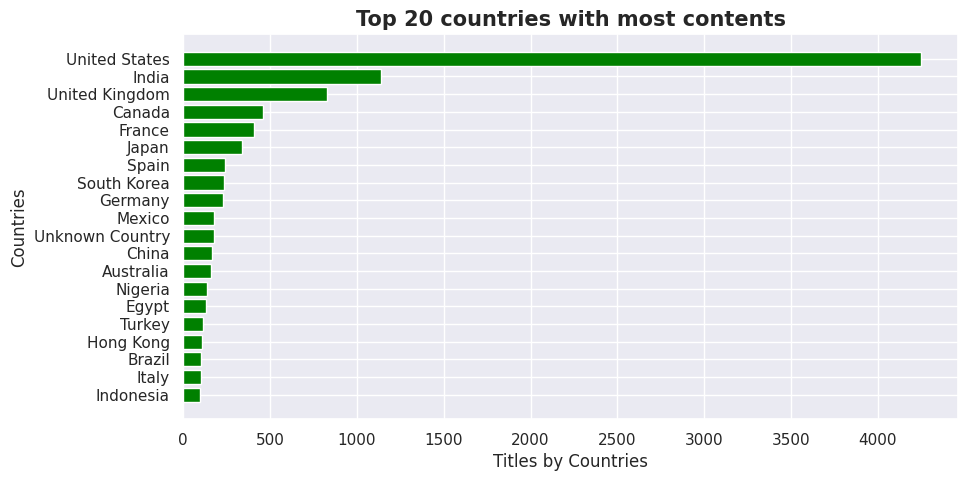

In [ ]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(10,5))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'], color="green")
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

#Who are the Top most Actors?

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai are the Top most watched content.

In [ ]:
#number of distinct titles on the basis of Actors
df_actos = df_final1.groupby(['Actors']).agg({"title":"nunique"})

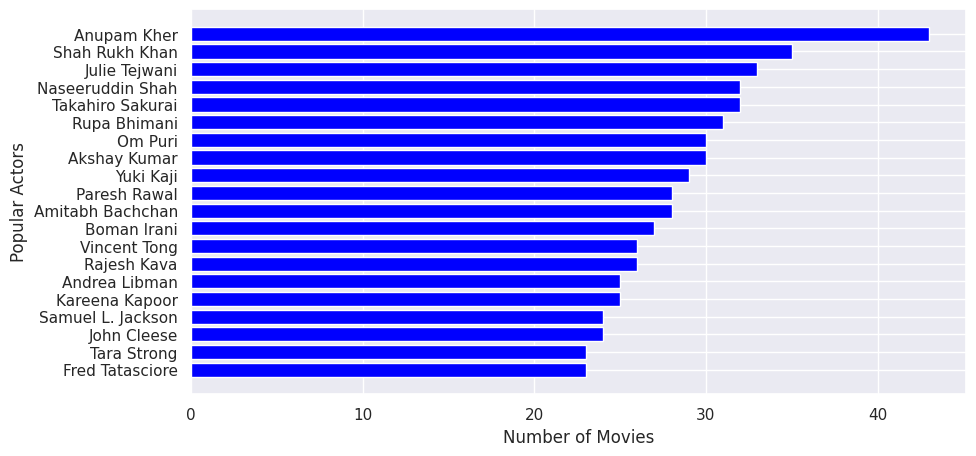

In [ ]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:21]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(10,5))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['blue'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

#Who are the Top most Directors?

Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

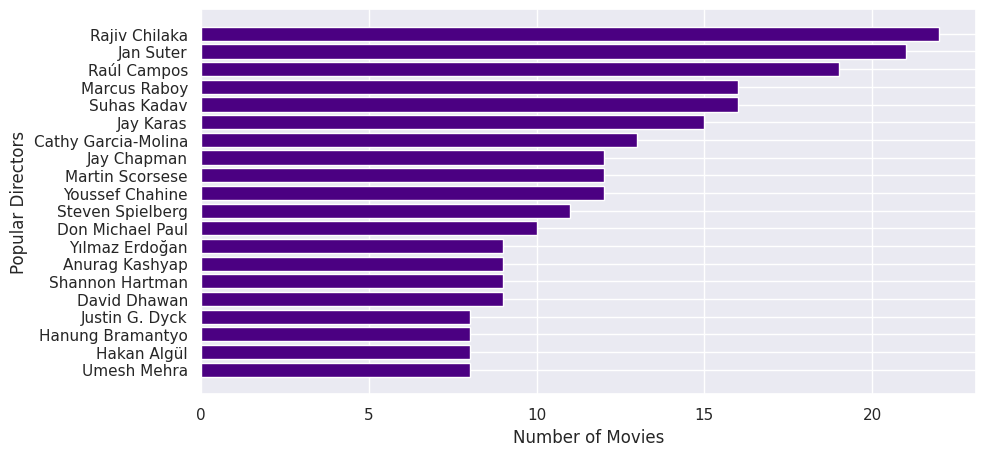

In [ ]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:21]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(10,5))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [ ]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

,title
year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,432


#Which year has largest number of movies/TV shows been released?

In [ ]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

As we can see most of the movies and TV shows on Netflix are released in 2018.

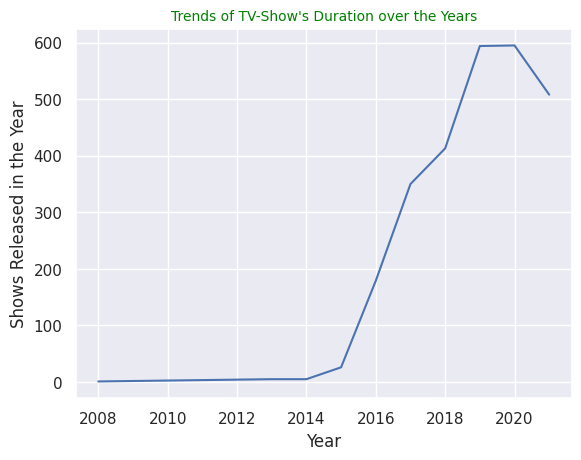

In [ ]:
plt.title("Trends of TV-Show's Duration over the Years", fontsize=10, color='Green');
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

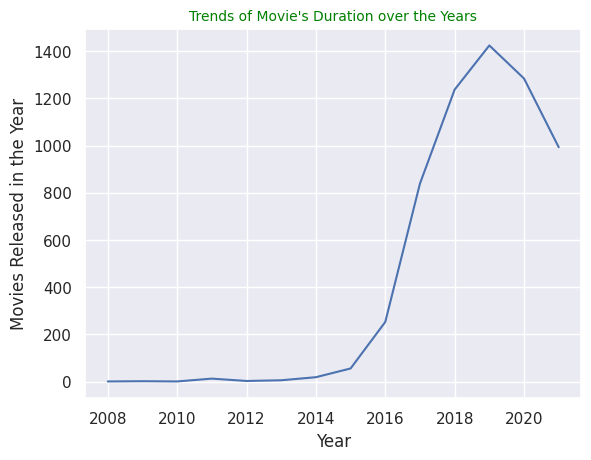

In [ ]:
plt.title("Trends of Movie's Duration over the Years", fontsize=10, color='Green');
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

#Which month has largest number of movies/TV shows been released?

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

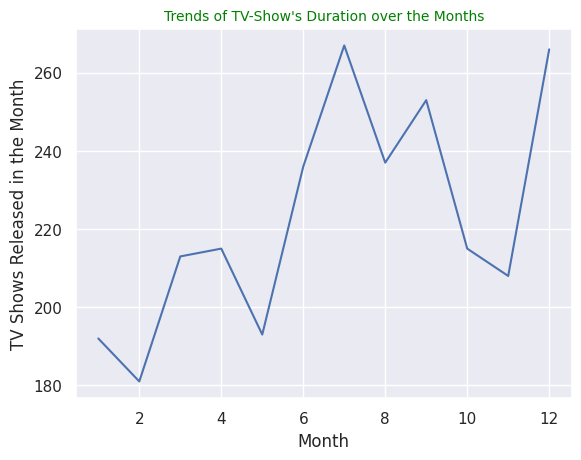

In [ ]:
plt.title("Trends of TV-Show's Duration over the Months", fontsize=10, color='Green');
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

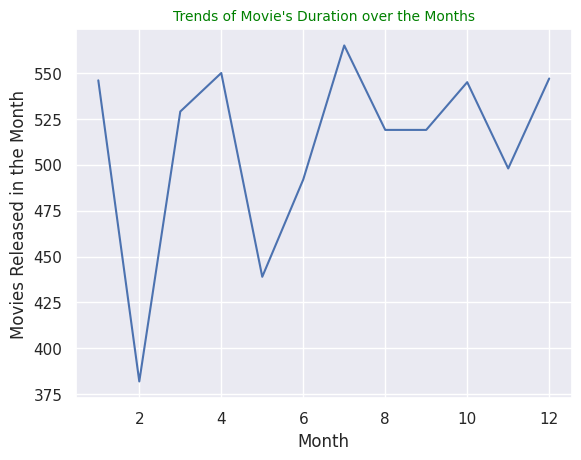

In [ ]:
plt.title("Trends of Movie's Duration over the Months", fontsize=10, color='Green');
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

#Bivariate Analysis:
Bi means two and variate means variable, so here there are two variables. The
analysis is related to cause and the relationship between the two variables. There are
three types of bivariate analysis.
A Bivariate Analysis of two Numerical Variables (Numerical-
Numerical)

#What is the distibution of duration to movies/Tv shows?

In [ ]:
netflix_movies_df = df_final1[df_final1.type.str.contains("Movie")]
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)',expand=False).astype(int)

<ipython-input-123-3ba68af5558e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)',expand=False).astype(int)


We can see that most movies fall within a reasonable duration
range, with few outliers exceedingly approximately 2.5 hours. This suggests that most
movies on Netflix are designed to fit within a standard viewing time.

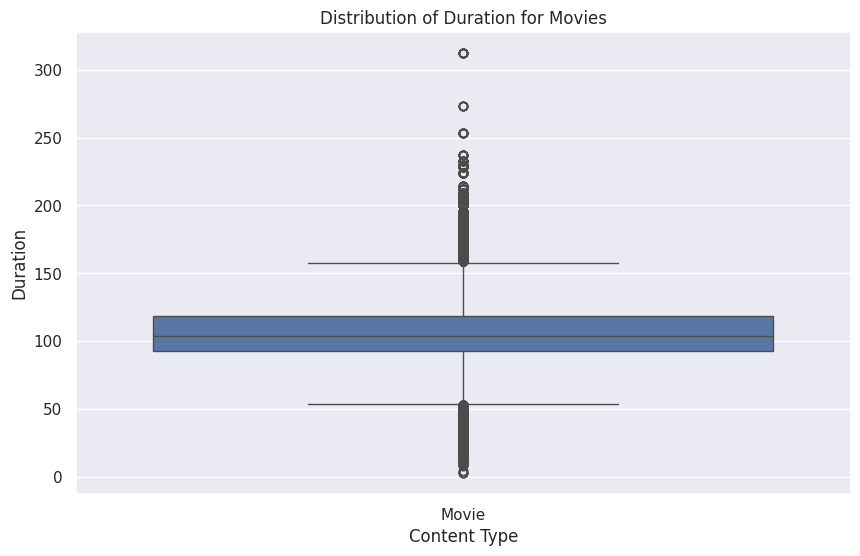

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=netflix_movies_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

In [ ]:
netflix_shows_df = df_final1[df_final1.type.str.contains("TV Show")]
netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',expand=False).astype(int)

<ipython-input-125-dc931d028b5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',expand=False).astype(int)


For TV shows, the most shows have one to two seasons, with very few
outliers having longer durations.

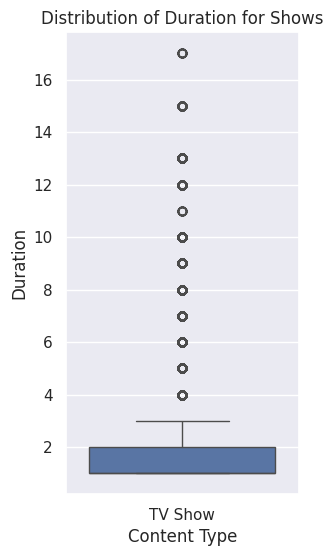

In [ ]:
# Creating a boxplot for movie duration
plt.figure(figsize=(3, 6))
sns.boxplot(data=netflix_shows_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Shows')
plt.show()

#Insights:

1. Netflix has added more movies than TV shows, 60% of the content of movies dominate their content.
2. Most of the highly rated content on Netflix is intended for (MA) Mature Audiences, R-rated.
3. The most content is under the genre of International movies and TV-Shows followed by Dramas and Comedies.
4. The most content for Netflix is, primarily, from the USA, with India and the UK significantly behind.
5. Anupam Kher is the actor who appears most considering the names on the cast for all titles on the Netflix catalog. Other common names include Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, and Takahiro Sakurai,
6. Duration for movies falls within the range of 90 to 150 minutes, as evidenced by the highest frequency of movie releases within this duration range. Additionally, current television preferences indicate a preference for TV shows featuring only one season to two seasons.

#Recommendations:

1. Netflix has to focus on TV Shows also because there are people who will like to see tv shows rather than movies.
2. Add TV Shows in July/August and Movies in the last week of the year/first month of the next year.
3. Mainly the release in OTT should focus on the festival holidays, year-end, and weekends which is to be mainly focussed.
4. In TV Shows Netflix has to focus on the thriller genre which will be helpful for having more no. of seasons.
5. Most of the content is added in the first, mid, and last months across Netflix
6. Advertisements in a country that has very less movies released should increase and attract people of that country by making their native TV Shows.
